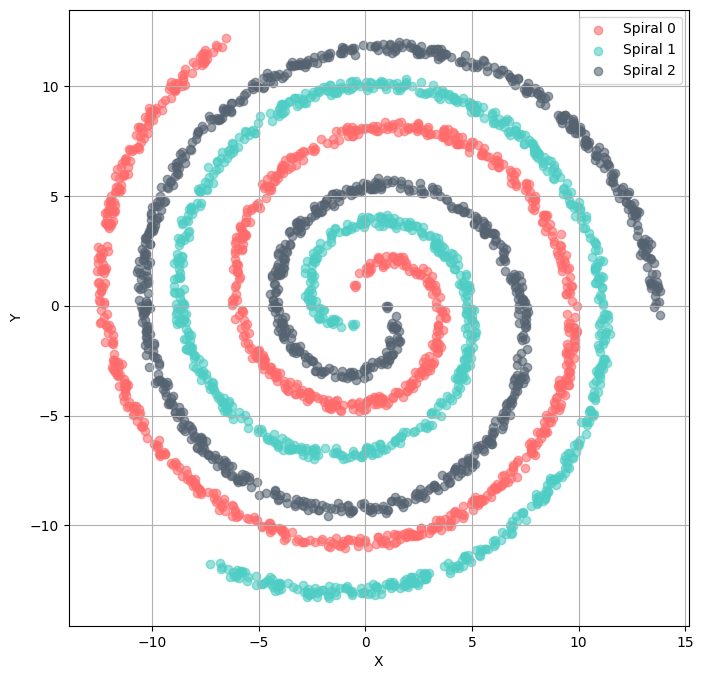

Epoch 1/200


/home/nathan3boss/.cache/pypoetry/virtualenvs/threespiral-bY-8qlRs-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3443 - f1_score: 0.3441 - loss: 1.9304 - val_accuracy: 0.3667 - val_f1_score: 0.2447 - val_loss: 1.6125 - learning_rate: 0.0010
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3548 - f1_score: 0.3549 - loss: 1.7328 - val_accuracy: 0.3708 - val_f1_score: 0.2398 - val_loss: 1.6101 - learning_rate: 0.0010
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3913 - f1_score: 0.3887 - loss: 1.6675 - val_accuracy: 0.3250 - val_f1_score: 0.2996 - val_loss: 1.6289 - learning_rate: 0.0010
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3959 - f1_score: 0.3949 - loss: 1.6404 - val_accuracy: 0.3229 - val_f1_score: 0.2877 - val_loss: 1.6112 - learning_rate: 0.0010
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4134 - f1_score: 0.4102 - loss: 1.6109 - val_accuracy: 0.3542 - val_f1_score: 0.2316 - val_loss: 1.6142 - learning_rate: 0.0010
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

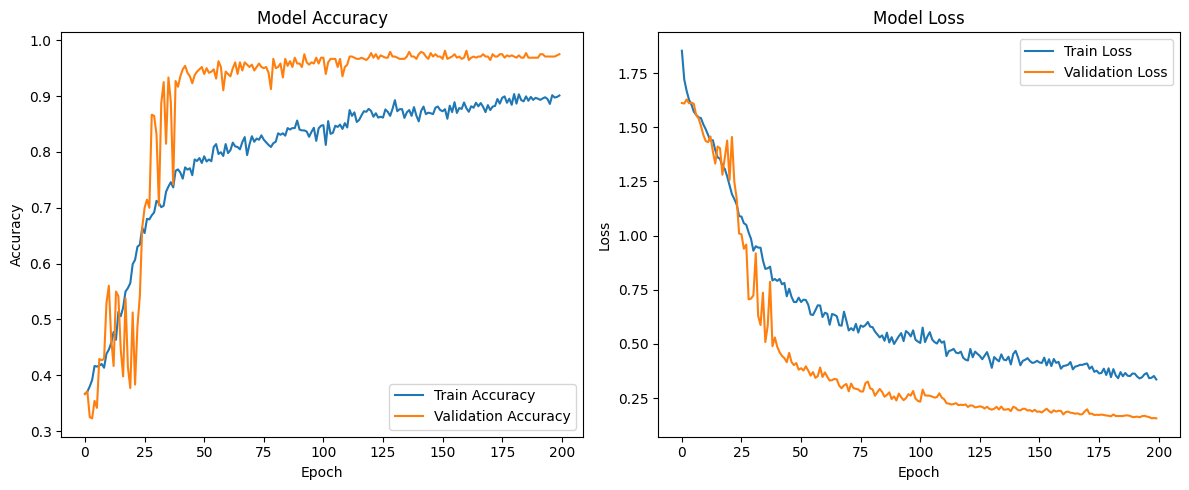

Test Accuracy: 0.9767
Test Loss: 0.1584
Test F1 Score: [0.9687499 0.9974554 0.9637882]
Macro F1 Score: 0.9767


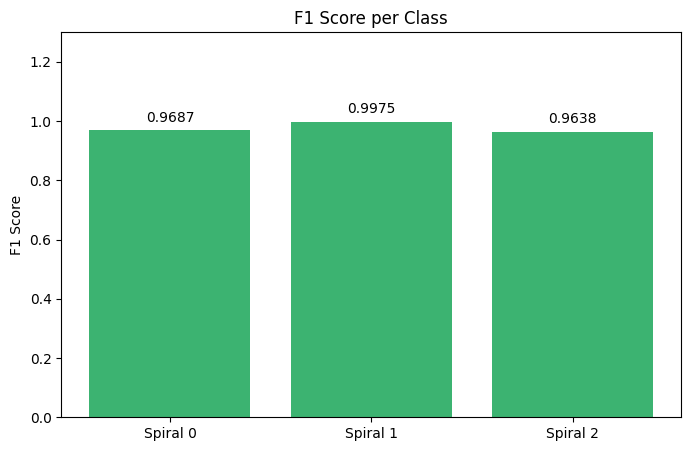

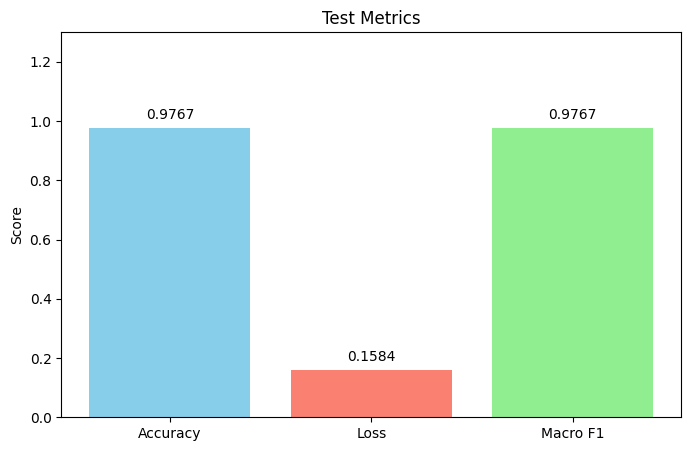

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       217
           1       1.00      0.99      1.00       197
           2       1.00      0.93      0.96       186

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

Confusion Matrix: [[217   0   0]
 [  1 196   0]
 [ 13   0 173]]


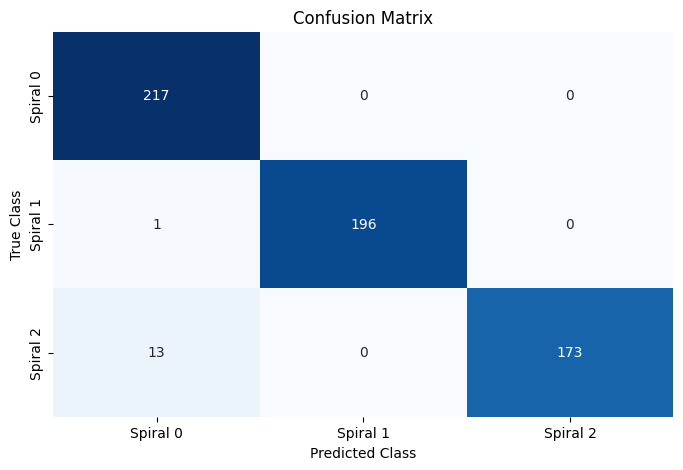

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


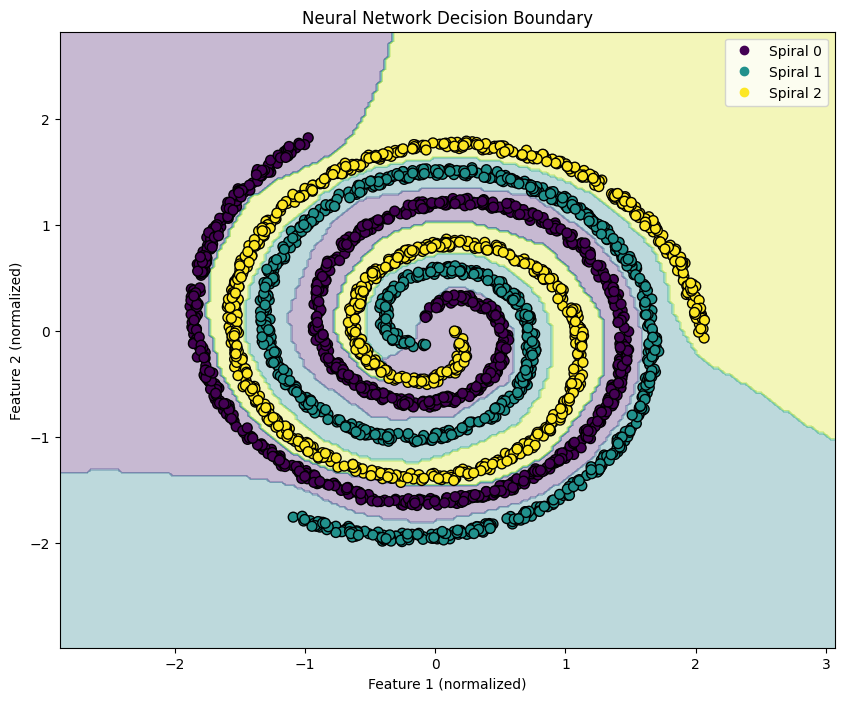

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

def build(npoints, noise=0.5):
    n = np.sqrt(np.random.rand(npoints, 1)) * 780 * (2 * np.pi) / 360

    d1x = -np.cos(n) * n + np.random.rand(npoints, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(npoints, 1) * noise
    data = np.vstack((np.hstack((d1x, d1y)),
                     np.hstack((d1x * np.cos(2 * np.pi / 3) - d1y * np.sin(2 * np.pi / 3),
                               d1x * np.sin(2 * np.pi / 3) + d1y * np.cos(2 * np.pi / 3))),
                     np.hstack((d1x * np.cos(4 * np.pi / 3) - d1y * np.sin(4 * np.pi / 3),
                               d1x * np.sin(4 * np.pi / 3) + d1y * np.cos(4 * np.pi / 3)))))
    
    labels = np.hstack((np.zeros(npoints),
                       np.ones(npoints),
                       np.full(npoints, 2)))
    
    return data, labels

np.random.seed(42)
X, y = build(1000, noise=0.5)


plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#FF6B6B', alpha=0.6, label='Spiral 0')  
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#4ECDC4', alpha=0.6, label='Spiral 1') 
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='#556270', alpha=0.6, label='Spiral 2') 

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.F1Score()])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

test_loss, test_acc, test_f1_score = model.evaluate(X_test, y_test, verbose=0)
f1_scores = test_f1_score.numpy()

print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test F1 Score: {f1_scores}')
print(f'Macro F1 Score: {tf.reduce_mean(test_f1_score).numpy():.4f}')

class_names = ['Spiral 0', 'Spiral 1', 'Spiral 2']

plt.figure(figsize=(8, 5))
bars = plt.bar(class_names, f1_scores, color='mediumseagreen')
plt.ylim(0, 1.3)
plt.title('F1 Score per Class')
plt.ylabel('F1 Score')

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2.0, score + 0.02, f'{score:.4f}', ha='center', va='bottom')
plt.show()

metrics = ['Accuracy', 'Loss', 'Macro F1']
values = [test_acc, test_loss, tf.reduce_mean(test_f1_score).numpy()]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1.3)
plt.title('Test Metrics')
plt.ylabel('Score')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print('\nClassification Report:')
print(classification_report(y_test_classes, y_pred_classes))

print(f'Confusion Matrix: {confusion_matrix(y_test_classes, y_pred_classes)}')
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            cbar=False,
            xticklabels=['Spiral 0', 'Spiral 1', 'Spiral 2'], 
            yticklabels=['Spiral 0', 'Spiral 1', 'Spiral 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis' \
    '')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), 
                      cmap='viridis', edgecolor='k', s=50)
    plt.title('Neural Network Decision Boundary')
    plt.xlabel('Feature 1 (normalized)')
    plt.ylabel('Feature 2 (normalized)')
    plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Spiral 0', 'Spiral 1', 'Spiral 2'])
    plt.show()

plot_decision_boundary(model, X_scaled, y_encoded)